In [10]:
import MySQLdb
import sshtunnel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import scipy.stats as stats
import random

In [11]:
sshtunnel.SSH_TIMEOUT = 5.0
sshtunnel.TUNNEL_TIMEOUT = 5.0

with sshtunnel.SSHTunnelForwarder(
    ('ssh.pythonanywhere.com'),
    ssh_username='Grawi', ssh_password='midgeq-xikFah-gukpu7',
    remote_bind_address=('Grawi.mysql.pythonanywhere-services.com', 3306)
) as tunnel:
    print("Successfully connected to Pythonanywhere")
    connection = MySQLdb.connect(
        user='Grawi',
        passwd='david2202087',
        host='127.0.0.1', port=tunnel.local_bind_port,
        db='Grawi$Interactive_quiz_database',
    )
    # Do stuff
    print("Successfully connected to database")
    
    try:
        cursor = connection.cursor()
        df = [None, None, None]
        df[0] = pd.read_sql("SELECT * FROM condition_1;", connection)
        df[1] = pd.read_sql("SELECT * FROM condition_2;", connection)
        df[2] = pd.read_sql("SELECT * FROM condition_3;", connection)
        print(f"Data read finished, length: condition 1 length {len(df[0])}, condition 2 length {len(df[1])}, condition 3 length {len(df[2])}")
    except Exception as e:
        print("Error:", e)
    
    finally:
        # Close the cursor and connection
        cursor.close()
        connection.close()

Successfully connected to Pythonanywhere
Successfully connected to database
Data read finished, length: condition 1 length 297, condition 2 length 600, condition 3 length 297


### Attention Pass Check

In [12]:
for i in range(3):
    df[i]['additional_answers'] = df[i]['additional_answers'].apply(literal_eval)
    df[i]['non_ideology_answers'] = df[i]['non_ideology_answers'].apply(literal_eval)
    try:
        if hasattr(df[i], 'ideology_answers'):
            df[i]['ideology_answers'] = df[i]['ideology_answers'].apply(literal_eval)
    except:
        None
    if hasattr(df[i], 'labels'):
        df[i]['labels'] = df[i]['labels'].apply(literal_eval)

In [13]:
for i in range(3):
    id_attention_failed = df[i][df[i]['attention_passed'] == 0]['participantId'].tolist()
    print(f"For condition {i + 1}, {len(id_attention_failed)} participants failed attention passed: {id_attention_failed}")
    df[i] = df[i][df[i]['attention_passed'] == True]
    columns_to_drop = ['assignmentId', 'projectId', 'attention_passed', 'total_time', 'identity_choices', 'ideologies', 'submit_time']
    df[i].drop(columns_to_drop, inplace=True, axis=1)
    print(f"There are {len(df[i])} valid data collected\n")
    df[i].set_index('participantId', inplace=True)
df[0].head()

For condition 1, 8 participants failed attention passed: ['363DEB2413FB48FD9D4CDCFD0EFE8171', '37A77F60BA16417D9170FF3AB76FFED3', '5911B1A9AE6D4E3388B295D078B7F49A', '60B62D2058D24418965396147B2746C3', '85364190604C4998AE9892A92449CB28', '9B32FED49EA64ABF85DB84B245455B26', 'DAF3701025BB4377BC901C1D6989C6A6', 'F5F966E8A63F467E9ABC254186478292']
There are 289 valid data collected

For condition 2, 15 participants failed attention passed: ['0660BC35F9D84A76AD94D044AB3E2F03', '07CB55A4B0EF4F969562F92636F194C4', '0AAAF5A90BE94134BA67E17D5C757684', '2E5CC51E01154406807CDCAB36006E62', '5CEE6A3A286F4719B90C4676FCD8E2FC', '67D7C1011797450CA613E3C92A47118F', '67E7D55F665A49D38C82E49C72B7077B', '69E4C35A0296446D87A626AF9CDA1A71', '755DFFC11EE74976929C37FF43133426', '79AF6A78556249CBAE9F5E92BD9A10A1', '7C7C5A02D261468B933EF149B2A04D9D', '8CBEF3832F99441C89B7952F00421DC6', '9FF5D3BF714E4790AA2D2CEE3F99C74E', 'ADD051D15E114D4CB67AD31B0FA8F673', 'B9E4A5C4C1D6458F9DEF6E9C7D4CB92F']
There are 585 valid

,bot_detected,non_ideology_answers,additional_answers,reason
participantId,,,,
000D1F259F974E9682C4EBD24445552A,33,"[{'answers': [-100, 3, -100], 'time_to_answer'...","[[0, 2, 0]]",I felt the choices were picked randomly
008A190019B6486B9A3B1E4D019EAEF1,53,"[{'answers': [-100, 1, -100], 'time_to_answer'...","[[0, 1, -1]]",I chose bot because I felt that none of the tr...
0162A54DBD78426689292407F226B9B2,3,"[{'answers': [-100, 2, -100], 'time_to_answer'...","[[-0.1, -2, -0.1]]",they were very fast and the answers I think mo...
05F5987ECD4D492E96AF3637F44C1FD5,66,"[{'answers': [-100, -1.8, -100], 'time_to_answ...","[[-0.8, 0.9, -0.6]]",
06D0A0B7823B4E6BBFEFA270E8EEB2F7,25,"[{'answers': [-100, 2.2, -100], 'time_to_answe...","[[-0.7, 1.1, -0.7]]",


### Bot detection

In [14]:
def get_bot_detection_num(detection):
    first = detection // 10
    second = detection % 10
    return int(first == 3) + int(second == 3)

ratio_at_least_one_bot_detected = []
ratio_one_bot_detected = []
ratio_two_bots_detected = []

for i in range(3):
    df[i]['bot_detection_num'] = df[i]['bot_detected'].apply(get_bot_detection_num)
    ratio_at_least_one_bot_detected.append(((df[i]['bot_detection_num'] >= 1).sum()) / (len(df[i])))
    ratio_one_bot_detected.append(((df[i]['bot_detection_num'] == 1).sum()) / (len(df[i])))
    ratio_two_bots_detected.append(((df[i]['bot_detection_num'] == 2).sum()) / (len(df[i])))
    print(f"For condition {i + 1}, there are {ratio_at_least_one_bot_detected[i]:.2%} participants who detected at least one bot")
    print(f"For condition {i + 1}, there are {ratio_one_bot_detected[i]:.2%} participants who detected one bot")
    print(f"For condition {i + 1}, there are {ratio_two_bots_detected[i]:.2%} participants who detected at two bots")
    df[i].drop(['reason', 'bot_detection_num'], axis=1, inplace=True)

For condition 1, there are 33.22% participants who detected at least one bot
For condition 1, there are 14.19% participants who detected one bot
For condition 1, there are 19.03% participants who detected at two bots
For condition 2, there are 29.40% participants who detected at least one bot
For condition 2, there are 12.82% participants who detected one bot
For condition 2, there are 16.58% participants who detected at two bots
For condition 3, there are 29.86% participants who detected at least one bot
For condition 3, there are 14.24% participants who detected one bot
For condition 3, there are 15.62% participants who detected at two bots


## Compare Average Distances and Plot The Figure

In [15]:
each_answer = [None, None, None]

def detect_first_answering_bot(row):
    if row['who_answers_first'] == 0:
        return (row['bot_detected'] // 10) == 3
    else:
        return (row['bot_detected'] % 10) == 3

def get_ideology_dis(row):
    additional_answers = row['additional_answers'][0]
    return abs(additional_answers[row['who_answers_first']] - additional_answers[1])

def calculate_answer_distance(row):
    if row['who_answers_first'] == 0 or row['who_answers_first'] == 2:
        return abs(row['answers'][1] - row['answers'][row['who_answers_first']])
    else:
        return (row['answers'][1] ** 2 + 9) / 6

for i in range(3):
    each_answer[i] = df[i].explode('non_ideology_answers')
    each_answer[i]['answers'] = each_answer[i].apply(lambda row: row['non_ideology_answers']['answers'], axis=1)
    each_answer[i]['idx_of_question'] = each_answer[i].apply(lambda row: row['non_ideology_answers']['idx_of_question'], axis=1)
    each_answer[i]['who_answers_first'] = each_answer[i].apply(lambda row: row['non_ideology_answers']['who_answers_first'], axis=1)
    each_answer[i]['bot_detection'] = each_answer[i].apply(detect_first_answering_bot, axis=1)
    each_answer[i]['ideology_distance'] = each_answer[i].apply(get_ideology_dis, axis=1)
    each_answer[i]['answer_distance'] = each_answer[i].apply(calculate_answer_distance, axis=1)
    each_answer[i].drop(['non_ideology_answers', 'bot_detected', 'additional_answers', 'answers'], axis=1, inplace=True)

each_answer[0].drop(['ideology_distance'], axis=1, inplace=True)

In [16]:
def get_validity_level(row):
    idx = row['who_answers_first']
    labels_set = set(row['labels'])
    if len(set([0, 1, 2, 3]).intersection(labels_set)) >= 2:
        return 0
    if len(set([4, 5]).intersection(labels_set)) >= 2:
        return 0
    if len(set([6, 7]).intersection(labels_set)) >= 2:
        return 0
    if len(set([8, 9]).intersection(labels_set)) >= 2:
        return 0
        
    if len(set([0, 1, 2, 3]).intersection(labels_set)) == 0:
        return 1

    if idx == 0 and len(set([2, 3]).intersection(labels_set)) == 0:
        return 2
    if idx == 2 and len(set([0, 1]).intersection(labels_set)) == 0:
        return 2
    
    return 3

def has_SCM_label(labels):
    if len(set([4, 5]).intersection(set(labels))) > 0 or len(set([8, 9]).intersection(set(labels))) > 0:
        return True
    return False

for i in [1, 2]:
    each_answer[i]['labels'] = each_answer[i].apply(lambda row: row['labels'][row['who_answers_first']], axis=1)
    each_answer[i]['validity_level'] = each_answer[i].apply(get_validity_level, axis=1)
    each_answer[i]['has_SCM_label'] = each_answer[i]['labels'].apply(has_SCM_label)
    each_answer[i].drop(['ideology_answers', 'labels'], axis=1, inplace=True)

In [17]:
for i in range(3):
    each_answer[i].to_csv(f'condition_{i + 1}.csv')

### Control 1: For condition 123, get the average answer distance when human answers first

In [9]:
human_first_answer_distances = []
for i in range(3):
    human_first_answer_distances += each_answer[i]['answer_distance'][each_answer[i]['who_answers_first'] == 1].tolist()
    
human_first_answer_distance = sum(human_first_answer_distances) / len(human_first_answer_distances)
print(f"If human answers first, the average answer distance is {human_first_answer_distance:.3f} ({int(len(human_first_answer_distances))} data points)")

If human answers first, the average answer distance is 2.021 (2326 data points)


### Control 2: For condition 1, get the average answer distance when bot answers first, differentiating bot detection

In [10]:
bot_first_answer_distance = each_answer[0]['answer_distance'][each_answer[0]['who_answers_first'] != 1].mean()
bot_first_not_detected_answer_distance = each_answer[0]['answer_distance'][(each_answer[0]['who_answers_first'] != 1) & (each_answer[0]['bot_detection'])].mean()
bot_first_detected_answer_distance = each_answer[0]['answer_distance'][(each_answer[0]['who_answers_first'] != 1) & (~each_answer[0]['bot_detection'])].mean()
print(f"If bot answers first, the average answer distance is {bot_first_answer_distance:.3f}")
print(f"If bot is detected, it's {bot_first_detected_answer_distance:.3f}, else it's {bot_first_not_detected_answer_distance:.3f}")

If bot answers first, the average answer distance is 1.709
If bot is detected, it's 1.691, else it's 1.762


In [11]:
# calculate separately for each question
bot_first_each_answer = each_answer[0][each_answer[0]['who_answers_first'] != 1]
each_answer_grouped = bot_first_each_answer.groupby("idx_of_question")
each_answer_grouped['answer_distance'].mean()

idx_of_question
0    1.706870
1    1.892793
2    1.582353
3    1.731092
4    1.612500
5    1.762590
Name: answer_distance, dtype: float64

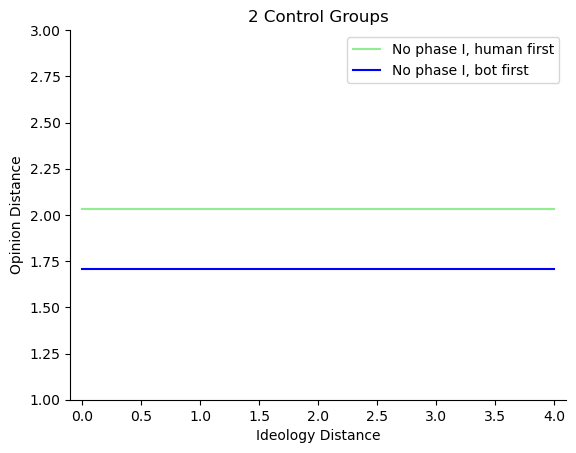

In [12]:
def plot_figure_when_bot_answers_first(each_answer, ax, color, label=None, display_scatter=False):
    bot_answers_first_c2 = each_answer['who_answers_first'] != 1
    bot_first_answer_distances_c2 = each_answer['answer_distance'][bot_answers_first_c2].tolist()
    bot_first_ideology_distances_c2 = each_answer['ideology_distance'][bot_answers_first_c2].tolist()
    m_c2, b_c2 = np.polyfit(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, deg=1)
    regression_line_x = np.linspace(0, 4, 100)
    regression_line_y_c2 = m_c2 * regression_line_x + b_c2
    if display_scatter:
        ax.scatter(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, color=color, s=5)
    ax.plot(regression_line_x, regression_line_y_c2, color=color, label=label)

fig, ax = plt.subplots()
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(1, 3)

ax.plot([0, 4], [human_first_answer_distance, human_first_answer_distance], color='lightgreen', label="No phase I, human first")
ax.plot([0, 4], [bot_first_answer_distance, bot_first_answer_distance], color='blue', label="No phase I, bot first")

ax.set_title('2 Control Groups')
ax.set_xlabel('Ideology Distance')
ax.set_ylabel('Opinion Distance')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

### Experiment 12: For condition 23, get the average answer distance when bot answers first regarding ideology distance

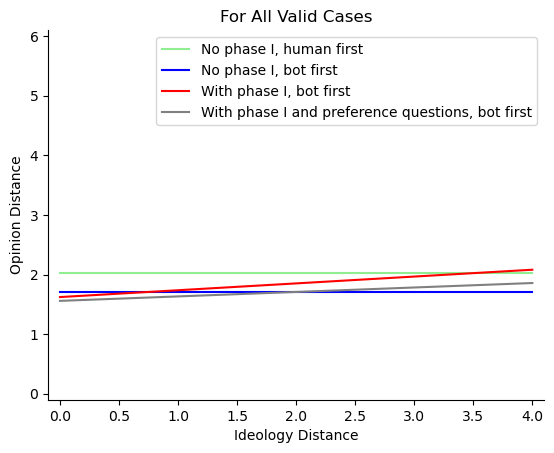

In [13]:
def plot_figure_when_bot_answers_first(each_answer, ax, color, label=None, display_scatter=False):
    bot_answers_first_c2 = each_answer['who_answers_first'] != 1
    bot_first_answer_distances_c2 = each_answer['answer_distance'][bot_answers_first_c2].tolist()
    bot_first_ideology_distances_c2 = each_answer['ideology_distance'][bot_answers_first_c2].tolist()
    m_c2, b_c2 = np.polyfit(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, deg=1)
    regression_line_x = np.linspace(0, 4, 100)
    regression_line_y_c2 = m_c2 * regression_line_x + b_c2
    if display_scatter:
        ax.scatter(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, color=color, s=5)
    ax.plot(regression_line_x, regression_line_y_c2, color=color, label=label)

fig, ax = plt.subplots()
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.1, 6.1)

ax.plot([0, 4], [human_first_answer_distance, human_first_answer_distance], color='lightgreen', label="No phase I, human first")
ax.plot([0, 4], [bot_first_answer_distance, bot_first_answer_distance], color='blue', label="No phase I, bot first")
plot_figure_when_bot_answers_first(each_answer[1], ax, color='r', label="With phase I, bot first", display_scatter=False)
plot_figure_when_bot_answers_first(each_answer[2], ax, color='grey', label="With phase I and preference questions, bot first", display_scatter=False)

ax.set_title('For All Valid Cases')
ax.set_xlabel('Ideology Distance')
ax.set_ylabel('Opinion Distance')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

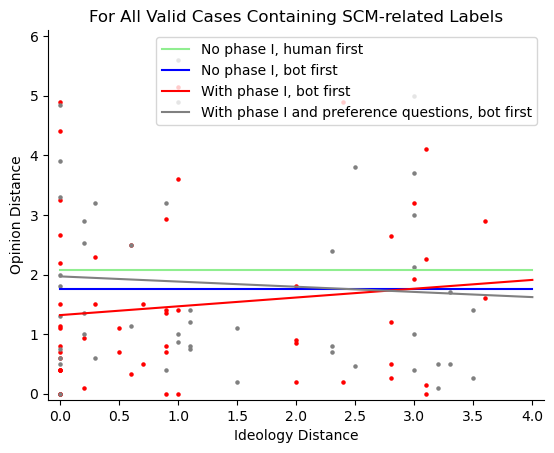

In [20]:
def plot_figure_when_bot_answers_first(each_answer, ax, color, label=None, display_scatter=False):
    bot_answers_first_c2 = each_answer['who_answers_first'] != 1
    bot_first_answer_distances_c2 = each_answer['answer_distance'][bot_answers_first_c2].tolist()
    bot_first_ideology_distances_c2 = each_answer['ideology_distance'][bot_answers_first_c2].tolist()
    m_c2, b_c2 = np.polyfit(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, deg=1)
    regression_line_x = np.linspace(0, 4, 100)
    regression_line_y_c2 = m_c2 * regression_line_x + b_c2
    if display_scatter:
        ax.scatter(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, color=color, s=5)
    ax.plot(regression_line_x, regression_line_y_c2, color=color, label=label)

fig, ax = plt.subplots()
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.1, 6.1)

ax.plot([0, 4], [human_first_answer_distance, human_first_answer_distance], color='lightgreen', label="No phase I, human first")
ax.plot([0, 4], [bot_first_answer_distance, bot_first_answer_distance], color='blue', label="No phase I, bot first")
plot_figure_when_bot_answers_first(each_answer[1][each_answer[1]['has_SCM_label']], ax, color='r', label="With phase I, bot first", display_scatter=True)
plot_figure_when_bot_answers_first(each_answer[2][each_answer[2]['has_SCM_label']], ax, color='grey', label="With phase I and preference questions, bot first", display_scatter=True)

ax.set_title("For All Valid Cases Containing SCM-related Labels")
ax.set_xlabel('Ideology Distance')
ax.set_ylabel('Opinion Distance')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

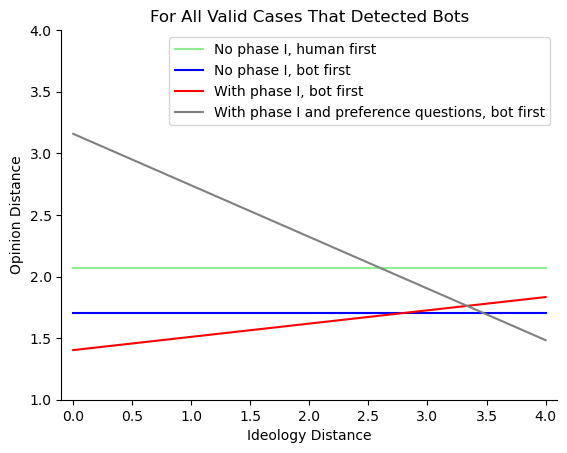

In [212]:
def plot_figure_when_bot_answers_first(each_answer, ax, color, label=None, display_scatter=False):
    bot_answers_first_c2 = each_answer['who_answers_first'] != 1
    bot_first_answer_distances_c2 = each_answer['answer_distance'][bot_answers_first_c2].tolist()
    bot_first_ideology_distances_c2 = each_answer['ideology_distance'][bot_answers_first_c2].tolist()
    m_c2, b_c2 = np.polyfit(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, deg=1)
    regression_line_x = np.linspace(0, 4, 100)
    regression_line_y_c2 = m_c2 * regression_line_x + b_c2
    if display_scatter:
        ax.scatter(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, color=color, s=5)
    ax.plot(regression_line_x, regression_line_y_c2, color=color, label=label)

fig, ax = plt.subplots()
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(1, 4)

ax.plot([0, 4], [human_first_answer_distance, human_first_answer_distance], color='lightgreen', label="No phase I, human first")
ax.plot([0, 4], [bot_first_detected_answer_distance, bot_first_detected_answer_distance], color='blue', label="No phase I, bot first")
plot_figure_when_bot_answers_first(each_answer[1][each_answer[1]['detect_first_answering_bot']], ax, color='r', label="With phase I, bot first")
plot_figure_when_bot_answers_first(each_answer[2][each_answer[2]['detect_first_answering_bot']], ax, color='grey', label="With phase I and preference questions, bot first")

ax.set_title('For All Valid Cases That Detected Bots')
ax.set_xlabel('Ideology Distance')
ax.set_ylabel('Opinion Distance')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

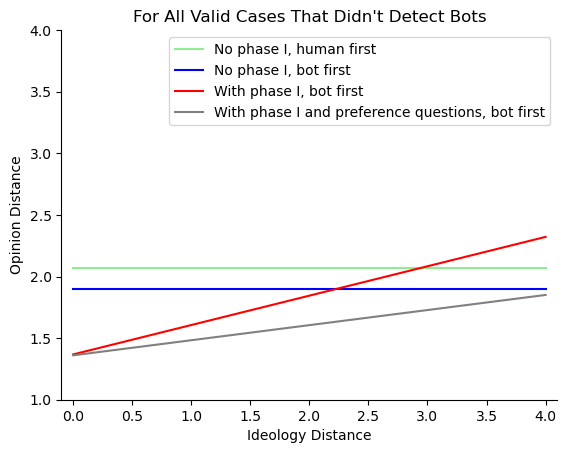

In [214]:
def plot_figure_when_bot_answers_first(each_answer, ax, color, label=None, display_scatter=False):
    bot_answers_first_c2 = each_answer['who_answers_first'] != 1
    bot_first_answer_distances_c2 = each_answer['answer_distance'][bot_answers_first_c2].tolist()
    bot_first_ideology_distances_c2 = each_answer['ideology_distance'][bot_answers_first_c2].tolist()
    m_c2, b_c2 = np.polyfit(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, deg=1)
    regression_line_x = np.linspace(0, 4, 100)
    regression_line_y_c2 = m_c2 * regression_line_x + b_c2
    if display_scatter:
        ax.scatter(x=bot_first_ideology_distances_c2, y=bot_first_answer_distances_c2, color=color, s=5)
    ax.plot(regression_line_x, regression_line_y_c2, color=color, label=label)

fig, ax = plt.subplots()
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(1, 4)

ax.plot([0, 4], [human_first_answer_distance, human_first_answer_distance], color='lightgreen', label="No phase I, human first")
ax.plot([0, 4], [bot_first_not_detected_answer_distance, bot_first_not_detected_answer_distance], color='blue', label="No phase I, bot first")
plot_figure_when_bot_answers_first(each_answer[1][~each_answer[1]['detect_first_answering_bot']], ax, color='r', label="With phase I, bot first")
plot_figure_when_bot_answers_first(each_answer[2][~each_answer[2]['detect_first_answering_bot']], ax, color='grey', label="With phase I and preference questions, bot first")

ax.set_title("For All Valid Cases That Didn't Detect Bots")
ax.set_xlabel('Ideology Distance')
ax.set_ylabel('Opinion Distance')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()